# Testing Dose Calculator Function
I'll do initial testing stuff and miscellaneous things here and then add them into `dose_calculator_tests.py`.

In [1]:
%pylab ipympl 
%load_ext autoreload
import siddon as sd
import imshow_slider as ims
from topas2numpy import BinnedResult
import pickle

Populating the interactive namespace from numpy and matplotlib


In [ ]:
# for a CT array of (Nx-1,Ny-1,Nz-1) voxels
Nx = 32
Ny = 32*8
Nz = 32

# distances between the x,y,z planes (also the lengths of the sides of the voxels) in cm
dx = 0.5
dy = 0.5/8
dz = 0.5

# initial and final coordinates of the beam
x1,x2 = (1,1)
y1,y2 = (1,1)
z1,z2 = (-9,9)

# initial plane coordinates
xplane1 = -3
yplane1 = -3
zplane1 = -3

# beam info and filename
beam_energy = 0.120 # in MeV
fluence_0 = 3.183098862 * 10**8 # photon/cm^2
filename = 'energy_absorption_coeff.txt'

# kernel info
kernelname = '../Topas/RealKernel1.csv'
kernel_size = (1,1,1) # cm 

siddon = sd.Siddon((Nx,Ny,Nz),(dx,dy,dz),((x1,x2),(y1,y2),(z1,z2)),(xplane1,yplane1,zplane1))
terma = sd.TERMA((Nx,Ny,Nz),(dx,dy,dz),((x1,x2),(y1,y2),(z1,z2)),(xplane1,yplane1,zplane1),beam_energy,fluence_0,filename)
dose = sd.Dose_Calculator((Nx,Ny,Nz),(dx,dy,dz),((x1,x2),(y1,y2),(z1,z2)),(xplane1,yplane1,zplane1),beam_energy,fluence_0,filename,kernelname,kernel_size)


In [16]:
terma

[{'d': 0.0, 'indices': (9, 9, 1), 'TERMA': 6520259.708920799},
 {'d': 0.5000000000000002, 'indices': (9, 9, 1), 'TERMA': 6520259.708920799},
 {'d': 0.5000000000000002, 'indices': (9, 9, 2), 'TERMA': 5986842.878387278},
 {'d': 0.5000000000000002, 'indices': (9, 9, 3), 'TERMA': 5497064.41929886},
 {'d': 0.4999999999999992, 'indices': (9, 9, 4), 'TERMA': 5047354.314075717},
 {'d': 0.5000000000000002, 'indices': (9, 9, 5), 'TERMA': 4634434.605201179},
 {'d': 0.5000000000000002, 'indices': (9, 9, 6), 'TERMA': 4255295.502039527},
 {'d': 0.5000000000000002, 'indices': (9, 9, 7), 'TERMA': 3907173.442334458},
 {'d': 0.5000000000000002, 'indices': (9, 9, 8), 'TERMA': 3587530.9484774536},
 {'d': 0.5000000000000002, 'indices': (9, 9, 9), 'TERMA': 3294038.131717475},
 {'d': 0.5000000000000002, 'indices': (9, 9, 10), 'TERMA': 3024555.7094953507},
 {'d': 0.4999999999999982, 'indices': (9, 9, 11), 'TERMA': 2777119.412115394},
 {'d': 0.5000000000000002, 'indices': (9, 9, 12), 'TERMA': 2549925.665093791

In [ ]:
dose_im_array = []

for dose_row in dose:
    dose_im_array.append(dose_row['energy'])

dose_im_array = np.array(dose_im_array)

dose_im_array = dose_im_array.reshape(Nx-1,Ny-1,Nz-1)

pickle.dump(dose_im_array,open('dose_test.pickle','wb'))

### Slider to Look at 3D Stuff

In [6]:
data = BinnedResult(kernelname).data['Sum']

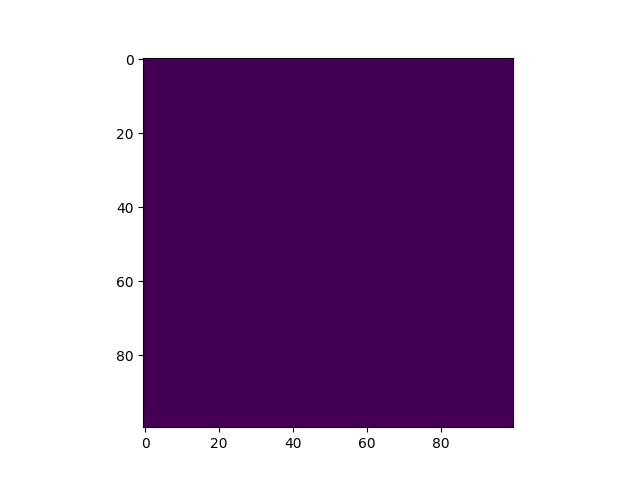

In [13]:
fig,ax,controls = ims.slider(data)

In [23]:
my_dose_array = pickle.load(open('dose_im_array.pickle','rb'))
mc_dose_array_full = BinnedResult('../Topas/TestingDose1.csv')
mc_dose_array = mc_dose_array_full.data['Sum']

In [ ]:
fig,ax,controls = ims.slider(dose_im_array)

### Tests for Superposition

In [2]:
test_kernel = array([[[0,0,0],[0,0.1,0],[0,0,0]],
                     [[0,0.1,0],[0.1,0.4,0.1],[0,0.1,0]],
                     [[0,0,0],[0,0.1,0],[0,0,0]]])

In [3]:
test_array_1 = array([[[1,1],[1,1]],
                      [[1,1],[1,1]]])
voxel_info_1 = []
n=0
for x in range(len(test_array_1)):
    for y in range(len(test_array_1[0])):
        for z in range(len(test_array_1[0][0])):
            voxel_info_1.append({})
            voxel_info_1[n]['indices'] = (x+1,y+1,z+1)
            voxel_info_1[n]['TERMA'] = (1,1,1)
            n += 1

voxel_info_1

[{'indices': (1, 1, 1), 'TERMA': (1, 1, 1)},
 {'indices': (1, 1, 2), 'TERMA': (1, 1, 1)},
 {'indices': (1, 2, 1), 'TERMA': (1, 1, 1)},
 {'indices': (1, 2, 2), 'TERMA': (1, 1, 1)},
 {'indices': (2, 1, 1), 'TERMA': (1, 1, 1)},
 {'indices': (2, 1, 2), 'TERMA': (1, 1, 1)},
 {'indices': (2, 2, 1), 'TERMA': (1, 1, 1)},
 {'indices': (2, 2, 2), 'TERMA': (1, 1, 1)}]

In [4]:
sd.Superposition(test_kernel,(2,2,2),(3,3,3),(2,2,2),voxel_info_1)

[{'indices': (1.0, 1.0, 1.0), 'energy': array([0., 0., 0.])},
 {'indices': (1.0, 1.0, 2.0), 'energy': array([0., 0., 0.])},
 {'indices': (1.0, 2.0, 1.0), 'energy': array([0., 0., 0.])},
 {'indices': (1.0, 2.0, 2.0), 'energy': array([0., 0., 0.])},
 {'indices': (2.0, 1.0, 1.0), 'energy': array([0., 0., 0.])},
 {'indices': (2.0, 1.0, 2.0), 'energy': array([0., 0., 0.])},
 {'indices': (2.0, 2.0, 1.0), 'energy': array([0., 0., 0.])},
 {'indices': (2.0, 2.0, 2.0), 'energy': array([0., 0., 0.])}]